In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
DATA_PATH = "bank-additional-full.csv" 
df = pd.read_csv("data/bank-additional-full.csv", sep=";")  

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39307,26,admin.,married,unknown,no,no,no,cellular,mar,thu,...,1,999,1,failure,-1.8,93.369,-34.8,0.643,5008.7,no
34418,32,admin.,single,high.school,no,yes,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
28499,30,admin.,married,university.degree,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,yes
38185,45,blue-collar,married,professional.course,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.744,5017.5,no
6626,56,retired,married,basic.6y,no,yes,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [13]:
df.nunique().sort_values(ascending=False)

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.price.idx      26
cons.conf.idx       26
job                 12
nr.employed         11
emp.var.rate        10
month               10
education            8
previous             8
day_of_week          5
marital              4
default              3
housing              3
poutcome             3
loan                 3
contact              2
y                    2
dtype: int64

In [14]:
num_df = df.select_dtypes(include=np.number)
num_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

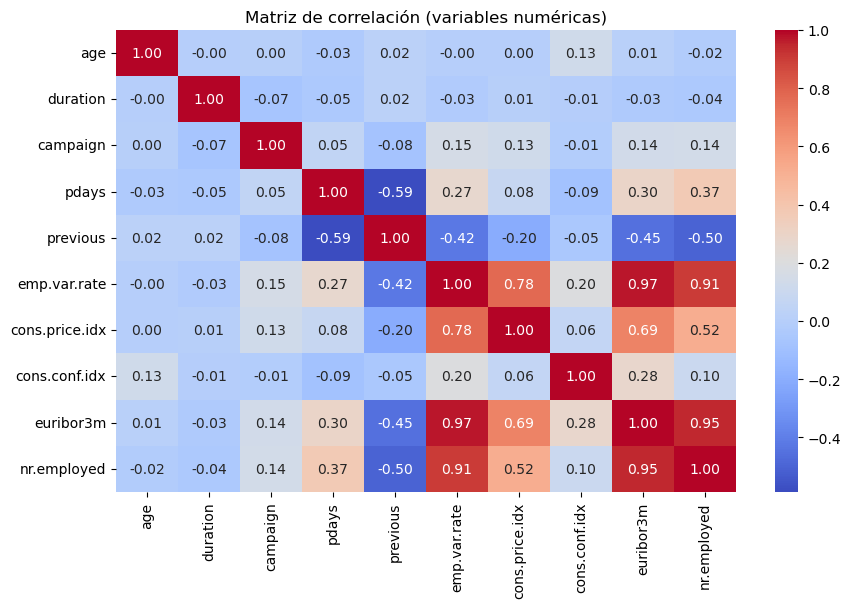

In [15]:
corr = num_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

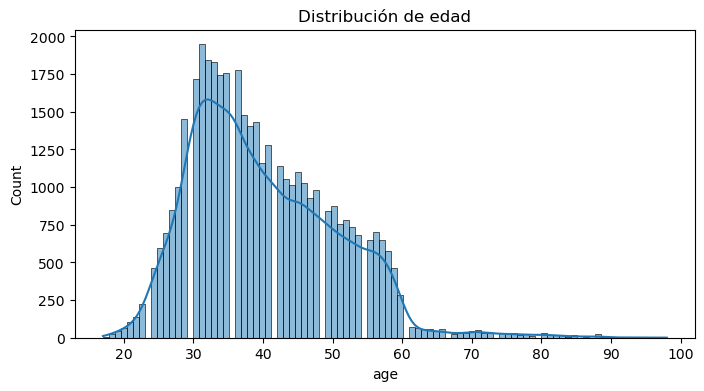

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df["age"], kde=True)
plt.title("Distribución de edad")
plt.show()

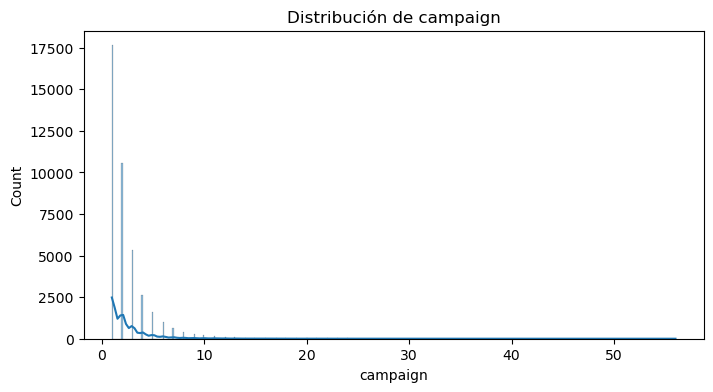

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df["campaign"], kde=True)
plt.title("Distribución de campaign")
plt.show()

In [18]:
threshold = 0.90
corr_matrix = num_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > threshold)]

to_drop_corr

['euribor3m', 'nr.employed']

In [19]:
df_reduced = df.drop(columns=to_drop_corr)
df_reduced.shape

(41188, 19)

In [20]:
cols_to_drop_manual = []
if "duration" in df_reduced.columns:
    cols_to_drop_manual.append("duration")

df_reduced = df_reduced.drop(columns=cols_to_drop_manual)
df_reduced.shape

(41188, 18)

In [21]:
df_reduced["marital"].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [22]:
df_reduced["education"].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [23]:
df_reduced["job"].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [24]:
report_groups = pd.DataFrame({
    "marital": df_reduced["marital"].value_counts(),
    "education": df_reduced["education"].value_counts(),
    "job": df_reduced["job"].value_counts()})
report_groups

,marital,education,job
admin.,NaN,NaN,10422.0
basic.4y,NaN,4176.0,NaN
basic.6y,NaN,2292.0,NaN
basic.9y,NaN,6045.0,NaN
blue-collar,NaN,NaN,9254.0
divorced,4612.0,NaN,NaN
entrepreneur,NaN,NaN,1456.0
high.school,NaN,9515.0,NaN
housemaid,NaN,NaN,1060.0
illiterate,NaN,18.0,NaN


In [25]:
df_reduced["y"].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [26]:
df_reduced["y"].value_counts(normalize=True) * 100

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

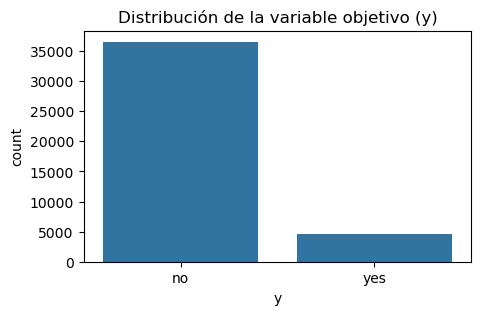

In [27]:
plt.figure(figsize=(5, 3))
sns.countplot(x="y", data=df_reduced)
plt.title("Distribución de la variable objetivo (y)")
plt.show()

In [28]:
job_y = pd.crosstab(df_reduced["job"], df_reduced["y"], normalize="index") * 100
job_y.sort_values(by="yes", ascending=False).head(10)

y,no,yes
job,,
student,68.571429,31.428571
retired,74.767442,25.232558
unemployed,85.798817,14.201183
admin.,87.027442,12.972558
management,88.782490,11.217510
unknown,88.787879,11.212121
technician,89.173958,10.826042
self-employed,89.514426,10.485574
housemaid,90.000000,10.000000


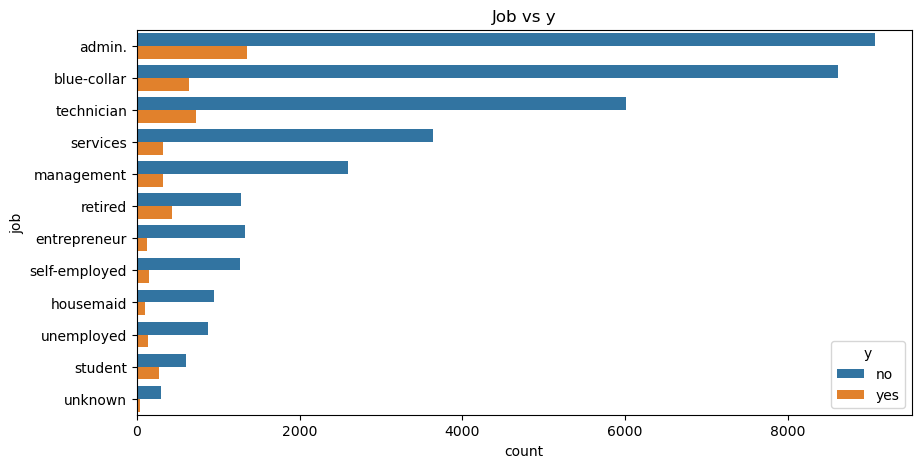

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(y="job", hue="y", data=df_reduced, order=df_reduced["job"].value_counts().index)
plt.title("Job vs y")
plt.show()

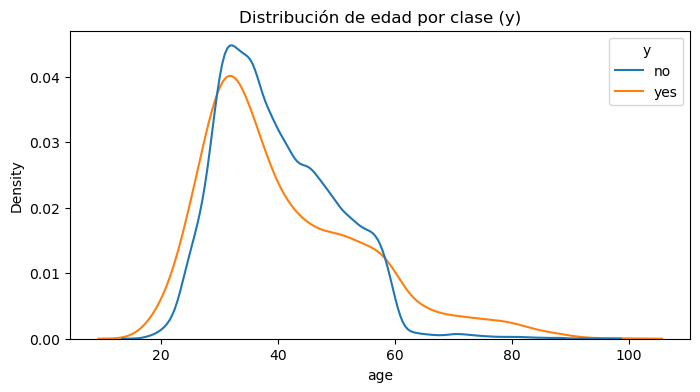

In [30]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_reduced, x="age", hue="y", common_norm=False)
plt.title("Distribución de edad por clase (y)")
plt.show()

In [31]:
X = df_reduced.drop(columns=["y"])
y = df_reduced["y"].map({"no": 0, "yes": 1})  # convertir a 0/1

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y)

X_train.shape, X_test.shape

((28831, 17), (12357, 17))

- En este análisis se realizó la exploración y limpieza del dataset de campañas de marketing bancario, revisando la calidad de los datos, sus distribuciones y las relaciones con la variable objetivo. Se identificaron variables relevantes y se eliminaron aquellas que podían afectar el modelo. Finalmente, el dataset quedó preparado y dividido en entrenamiento y prueba, listo para aplicar modelos de machine learning.